In [ ]:
# Imports
library(Seurat)
library(gridExtra)
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(grid)
library(dplyr)


# Change setting for visualizing plots within VSCODE
options(repr.plot.width=18, repr.plot.height=22)

# Myeloid data from mice and humans
myeloids_m <- readRDS("../../data/R Objects/Myeloid R Objects/all_mice_myeloid_data_v3.rds")
myeloids_h <- readRDS("../../data/R Objects/Myeloid R Objects/all_humans_myeloid_results.rds")

Warning message:
"package 'Seurat' was built under R version 4.4.2"
Loading required package: SeuratObject

Warning message:
"package 'SeuratObject' was built under R version 4.4.2"
Loading required package: sp

Warning message:
"package 'sp' was built under R version 4.4.2"

Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t


Warning message:
"package 'gridExtra' was built under R version 4.4.2"
Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'ggrepel' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [ ]:
# Assign correct high-res to mice
myeloids_m$seurat_clusters <- myeloids_m$`RNA_snn_res.1.2`

# Ensure correct identities
myeloids_m <- SetIdent(myeloids_m, value = "seurat_clusters")
myeloids_m <- RenameIdents(myeloids_m,
                                   '0' = 'Macrophages',
                                   '1' = 'Macrophages',
                                   '2' = 'Macrophages', 
                                   '3' = 'Macrophages',
                                   '4' = 'Macrophages',
                                   '5' = 'Dendritic cells',
                                   '6' = 'Dendritic cells',
                                   '7' = 'Monocytes',
                                   '8' = 'Macrophages', 
                                   '9' = 'Macrophages',
                                   '10' = 'Macrophages',
                                   '11' = 'Dendritic cells',
                                   '12' = 'Macrophages',
                                   '13' = 'Dendritic cells', 
                                   '14' = 'Dendritic cells',
                                   '15' = 'T-cell') 

# Assign correct high-res to humans
myeloids_h <- SetIdent(myeloids_h, value = "RNA_snn_res.1.5")

# Ensure correct identities
myeloids_h <- RenameIdents(myeloids_h,
                                   '0' = 'Macrophages',
                                   '1' = 'Macrophages',
                                   '2' = 'Macrophages', 
                                   '3' = 'Monocytes',
                                   '4' = 'Macrophages',
                                   '5' = 'Macrophages',
                                   '6' = 'Macrophages',
                                   '7' = 'Monocytes',
                                   '8' = 'Macrophages', 
                                   '9' = 'Macrophages',
                                   '10' = 'Macrophages',
                                   '11' = 'Macrophages',
                                   '12' = 'Macrophages',
                                   '13' = 'Dendritic cells', 
                                   '14' = 'Dendritic cells',
                                   '15' = 'Macrophages',
                                   '16' = 'Macrophages', 
                                   '17' = 'Monocytes', # I think monocytes
                                   '18' = 'Macrophages',
                                   '19' = 'Monocytes',
                                   '20' = 'Macrophages',
                                   '21' = 'Dendritic cells',
                                   '22' = 'Dendritic cells', 
                                   '23' = 'Macrophages', # Twijfelgeval
                                   '24' = 'Dendritic cells',
                                   '25' = 'Dendritic cells',
                                   '26' = 'Natural killer cells',
                                   '27' = 'Macrophages')

In [4]:
# FInd markers for mice
markers_m <- FindAllMarkers(myeloids_m, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers_m %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Top 10
top10_m <- markers_m %>% group_by(cluster) %>% top_n(10, avg_log2FC)

# Find markers for humans
markers_h <- FindAllMarkers(myeloids_h, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers_h %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > .75) %>%
  slice_head(n = 10) %>%
  ungroup() -> top10

# Top 10
top10_h <- markers_h %>% group_by(cluster) %>% top_n(10, avg_log2FC)

Calculating cluster Macrophages

Calculating cluster Dendritic cells

Calculating cluster Monocytes

Calculating cluster T-cell

Calculating cluster Macrophages

Calculating cluster Monocytes

Calculating cluster Dendritic cells

Calculating cluster Natural killer cells



In [5]:
# Change the order of identities to match color scheme in plot
Idents(myeloids_m) <- factor(Idents(myeloids_m), levels = c("Macrophages", "Monocytes", "Dendritic cells", "T-cell"))

In [6]:
# Plot of Final annotations of mice
myeloids_m$cell_type_idents <- Idents(myeloids_m)
final_annotation_m <- DimPlot(object = myeloids_m, reduction = "umap", label = T, label.size = 14, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.75, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

heatmap_m <- DoHeatmap(myeloids_m, features = top10_m$gene, size=5, angle=0, raster=FALSE, label = FALSE) + 
guides(
  colour = FALSE, fill = guide_colorbar(
    barwidth = 2, 
    bar.height = 100, 
    title.theme = element_text(size = 24),
    label.theme = element_text(size = 24))
  ) + 
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(axis.text.y = element_text(size=28))

Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."
Warning message in DoHeatmap(myeloids_m, features = top10_m$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Cd247, Gimap9, Dntt"
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [ ]:
# Plot of Final annotations of mice
myeloids_h$cell_type_idents <- Idents(myeloids_h)
final_annotation_h <- DimPlot(object = myeloids_h, reduction = "umap", group.by = "cell_type_idents", label = T, label.size = 14, repel = T) + 
    theme(plot.title = element_blank(), legend.position = c(0.75, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

# Create heatmap
heatmap_h <- DoHeatmap(myeloids_h, features = top10_h$gene, size=5, angle=0, raster=FALSE, label = FALSE) + 
guides(
  colour = FALSE, fill = guide_colorbar(
    barwidth = 2, 
    bar.height = 100, 
    title.theme = element_text(size = 24),
    label.theme = element_text(size = 24))
  ) + 
  scale_fill_viridis_c(option="blue",na.value = "white") + theme(axis.text.y = element_text(size=28))

Warning message in DoHeatmap(myeloids_h, features = top10_h$gene, size = 5, angle = 0, :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: THEMIS, PTPRCAP"
Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'blue' does not exist. Defaulting to 'viridis'."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


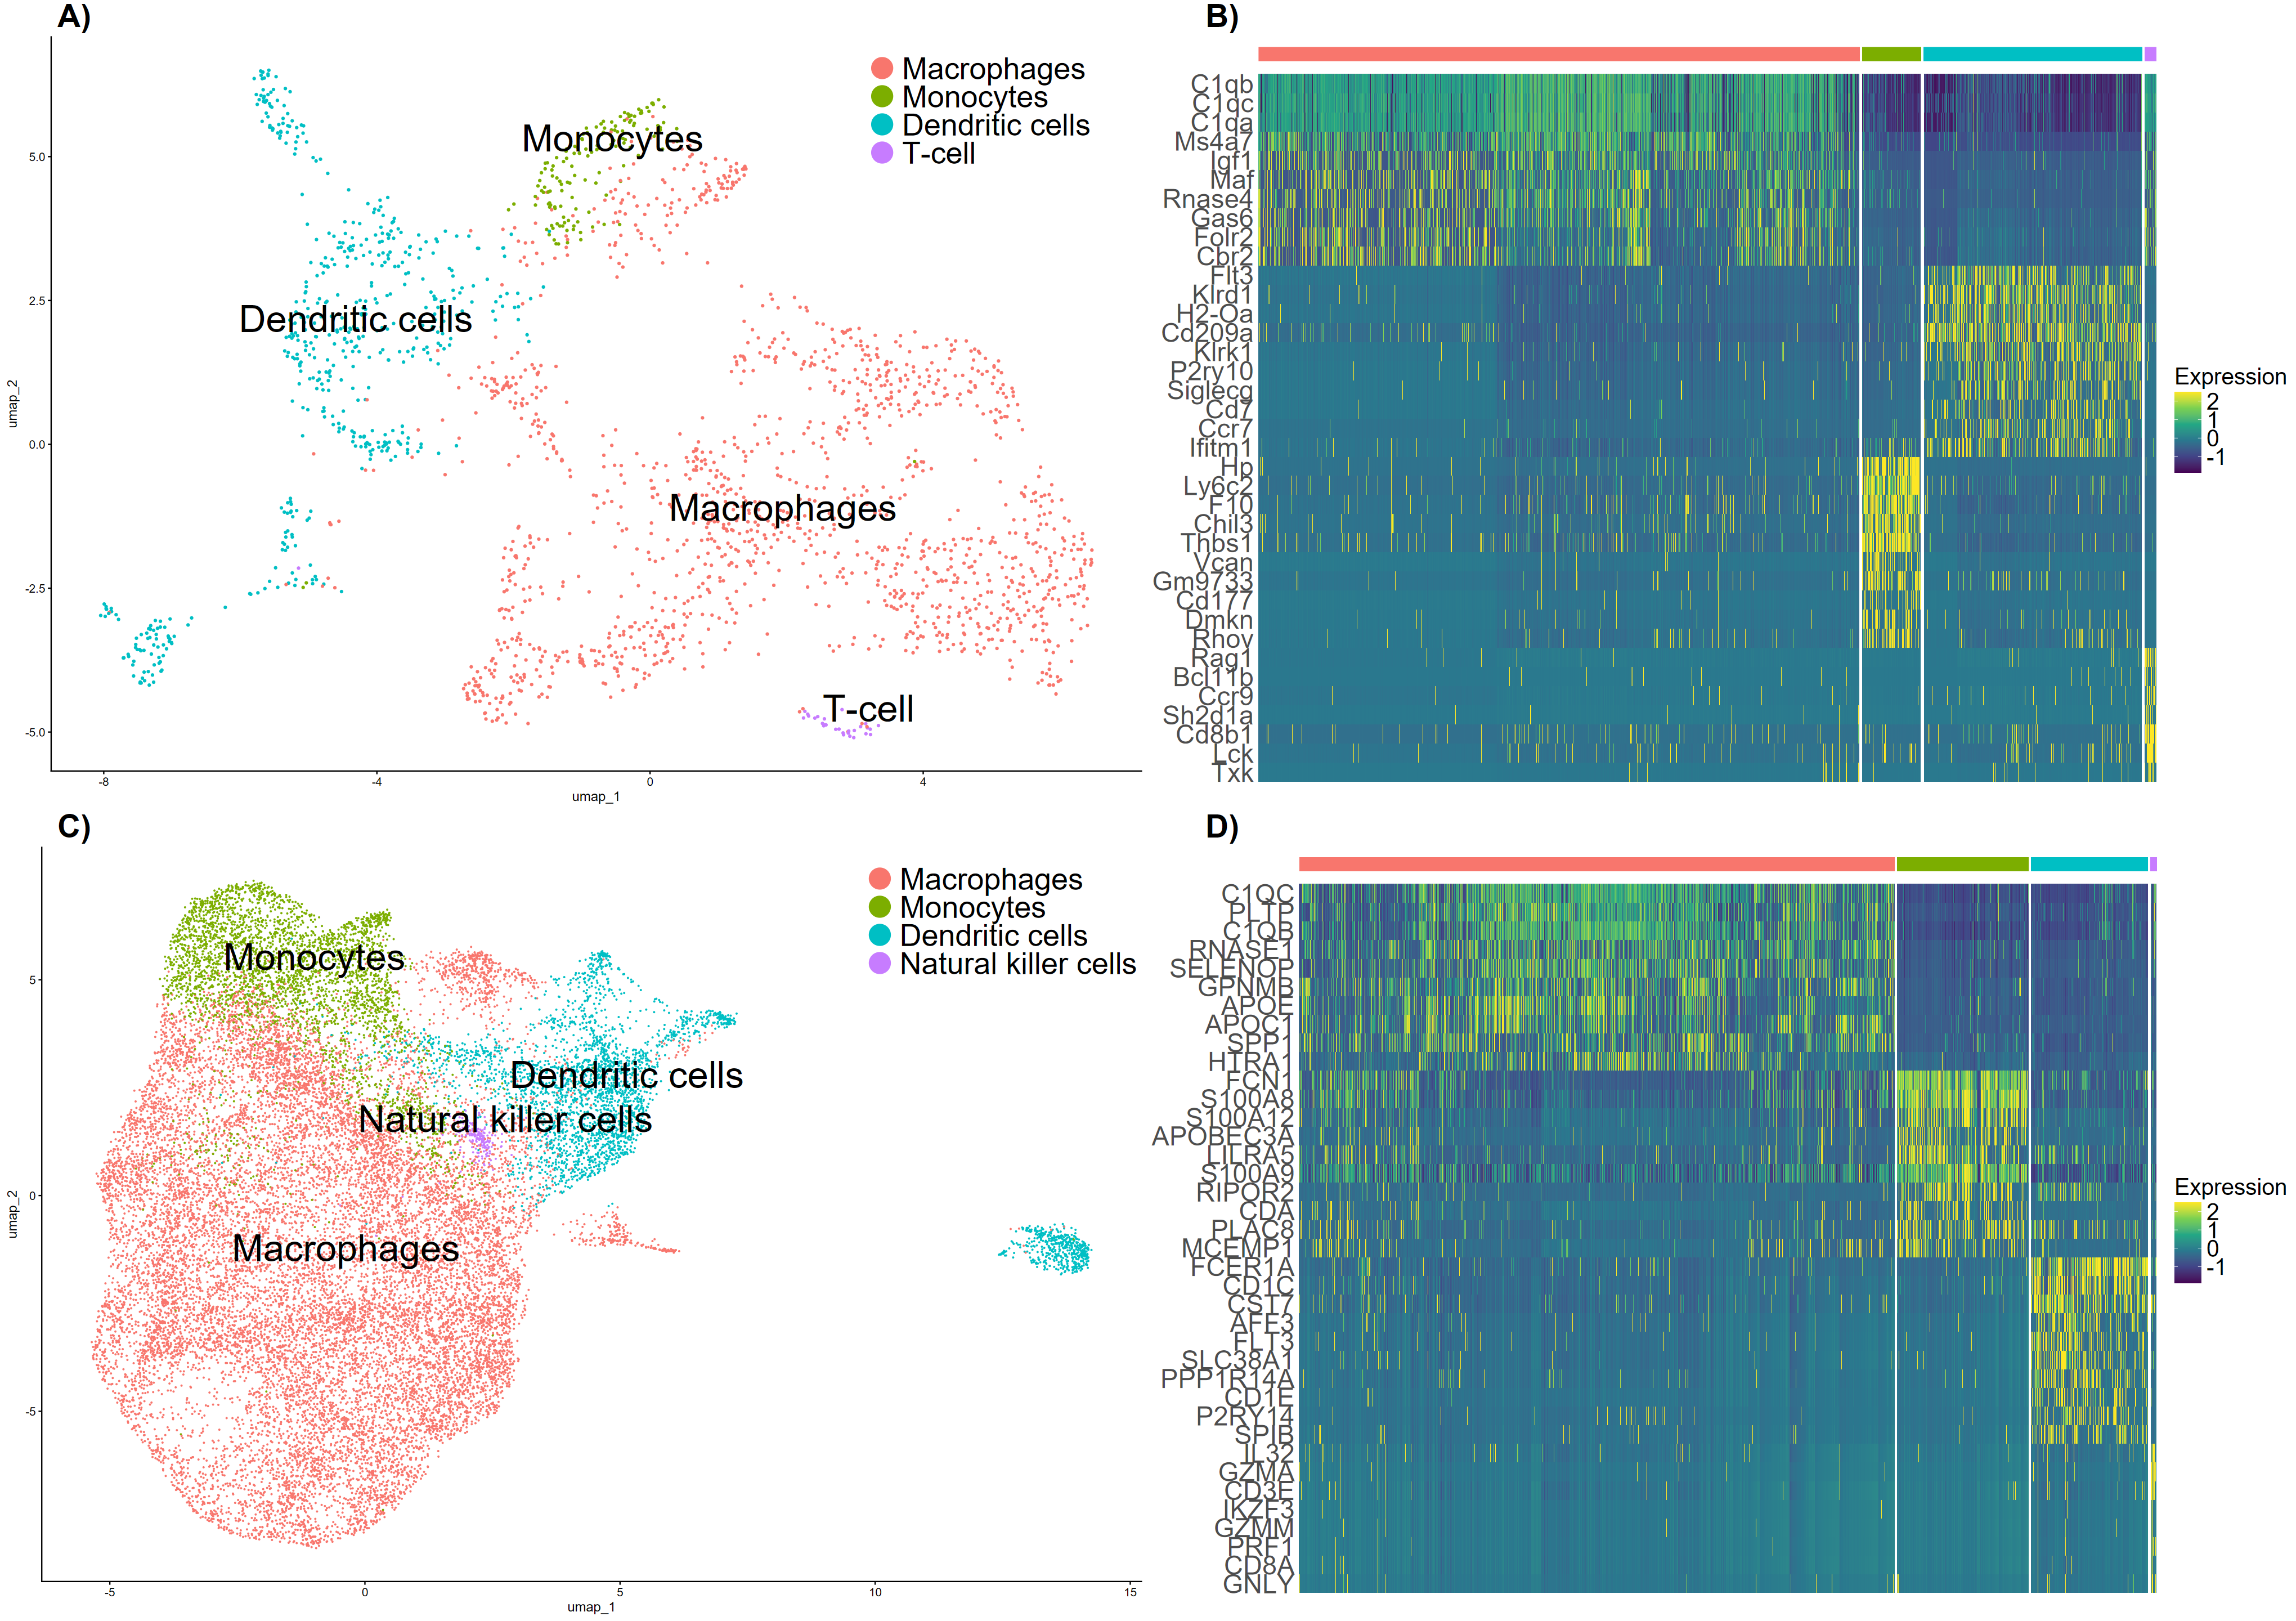

In [8]:
# Define the layout matrix
layout_matrix <- rbind(
  c(1, 2),
  c(3, 4)
)

# Change setting for visualizing plots within VSCODE
options(repr.plot.width=34, repr.plot.height=24)

# Create labeled plots
mice_umap <- arrangeGrob(final_annotation_m, 
                                  top = textGrob("A)", x = unit(0.05, "npc"), just = "left", 
                                                 gp = gpar(fontsize = 34, fontface = "bold")))

mice_heatmap <- arrangeGrob(heatmap_m, 
                               top = textGrob("B)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))

human_umap <- arrangeGrob(final_annotation_h, 
                         top = textGrob("C)", x = unit(0.05, "npc"), just = "left", 
                                        gp = gpar(fontsize = 34, fontface = "bold")))
human_heatmap <- arrangeGrob(heatmap_h, 
                               top = textGrob("D)", x = unit(0.05, "npc"), just = "left", 
                                              gp = gpar(fontsize = 34, fontface = "bold")))
# Arrange the plots with labels
grid.arrange(
  mice_umap, mice_heatmap, human_umap, human_heatmap,
  layout_matrix = layout_matrix
)

In [ ]:
# Create plot of final annotations of human myeloids
final_annotation_h <- DimPlot(object = myeloids_h, reduction = "umap", group.by = "cell_type_idents", label = T, label.size = 15, repel = T, pt.size =1.1) + 
    theme(plot.title = element_blank(), legend.position = c(0.75, 0.9), legend.text = element_text(size = 32), legend.title = element_text(size = 16, face = "bold")) + 
    guides(color = guide_legend(override.aes = list(size=10), ncol=1))

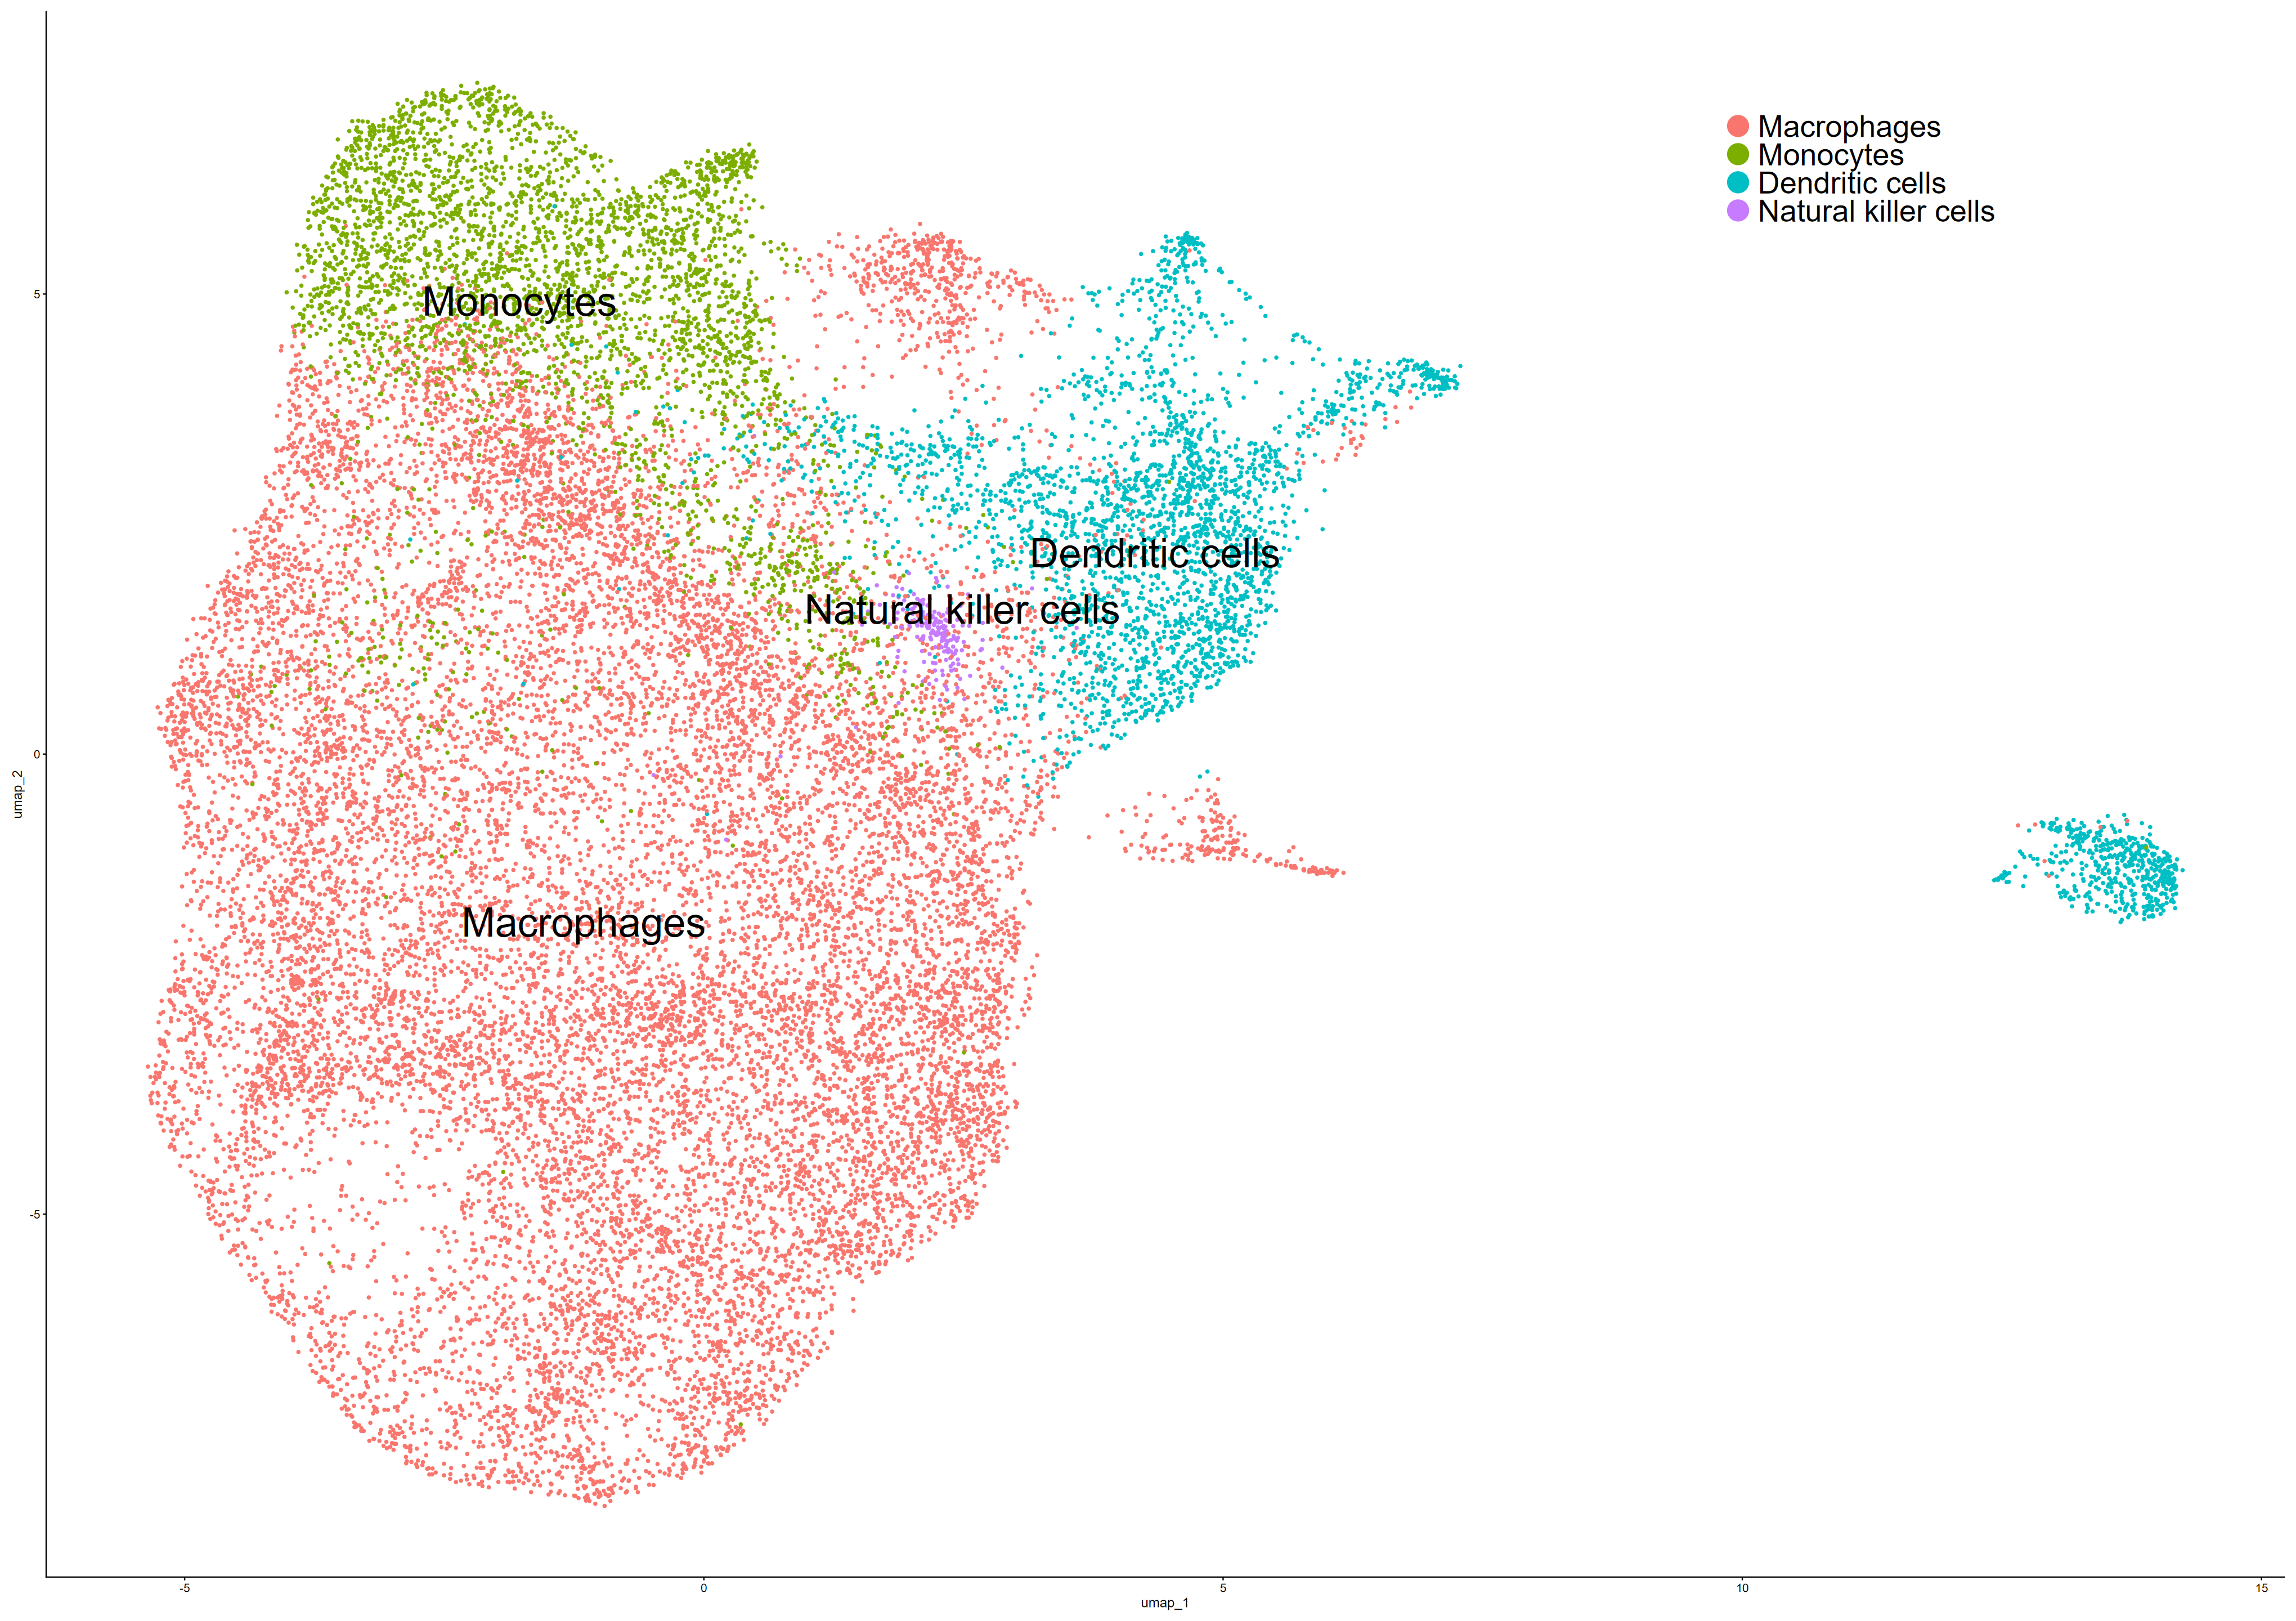

In [ ]:
# Show final annotation myeloids
final_annotation_h